
<a target="_blank" href="https://colab.research.google.com/github.com/aygul0790/Bootcamp/blob/main/LLM_Agents.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# What are Agents?

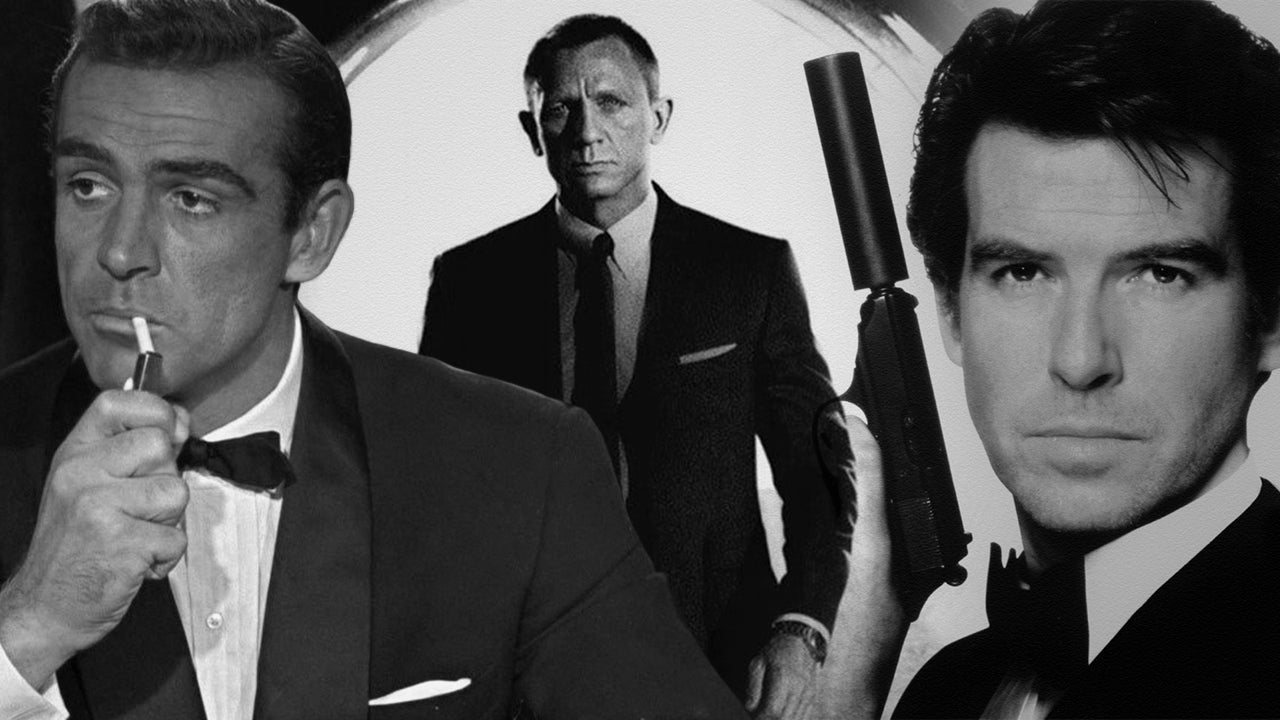

# What is an LLM agent?
**An LLM agent is a program whose execution logic is controlled by its underlying model.**

## 5 components of an Agent

**LLM** - The agent is powered by an LLM, you can think of it as the brain

**Observation** - Every agent has the capability to observe the surroundings for example, an agent can take inputs in the form of a picture, text, or a video. This is the functioning organ of the agent.

**Thought** - After the agent observes the surroundings, it can start thinking on the next steps to take.

**Action** - Agents can interact with external systems using something called as 'tools'. The more powerful the tools are, the more powerful is the agent!

**Memory** - Agents can also have the power to remember the past and can derive insights from it like a human.

# How do Agents work?

### High-level Overview of an LLM Agent

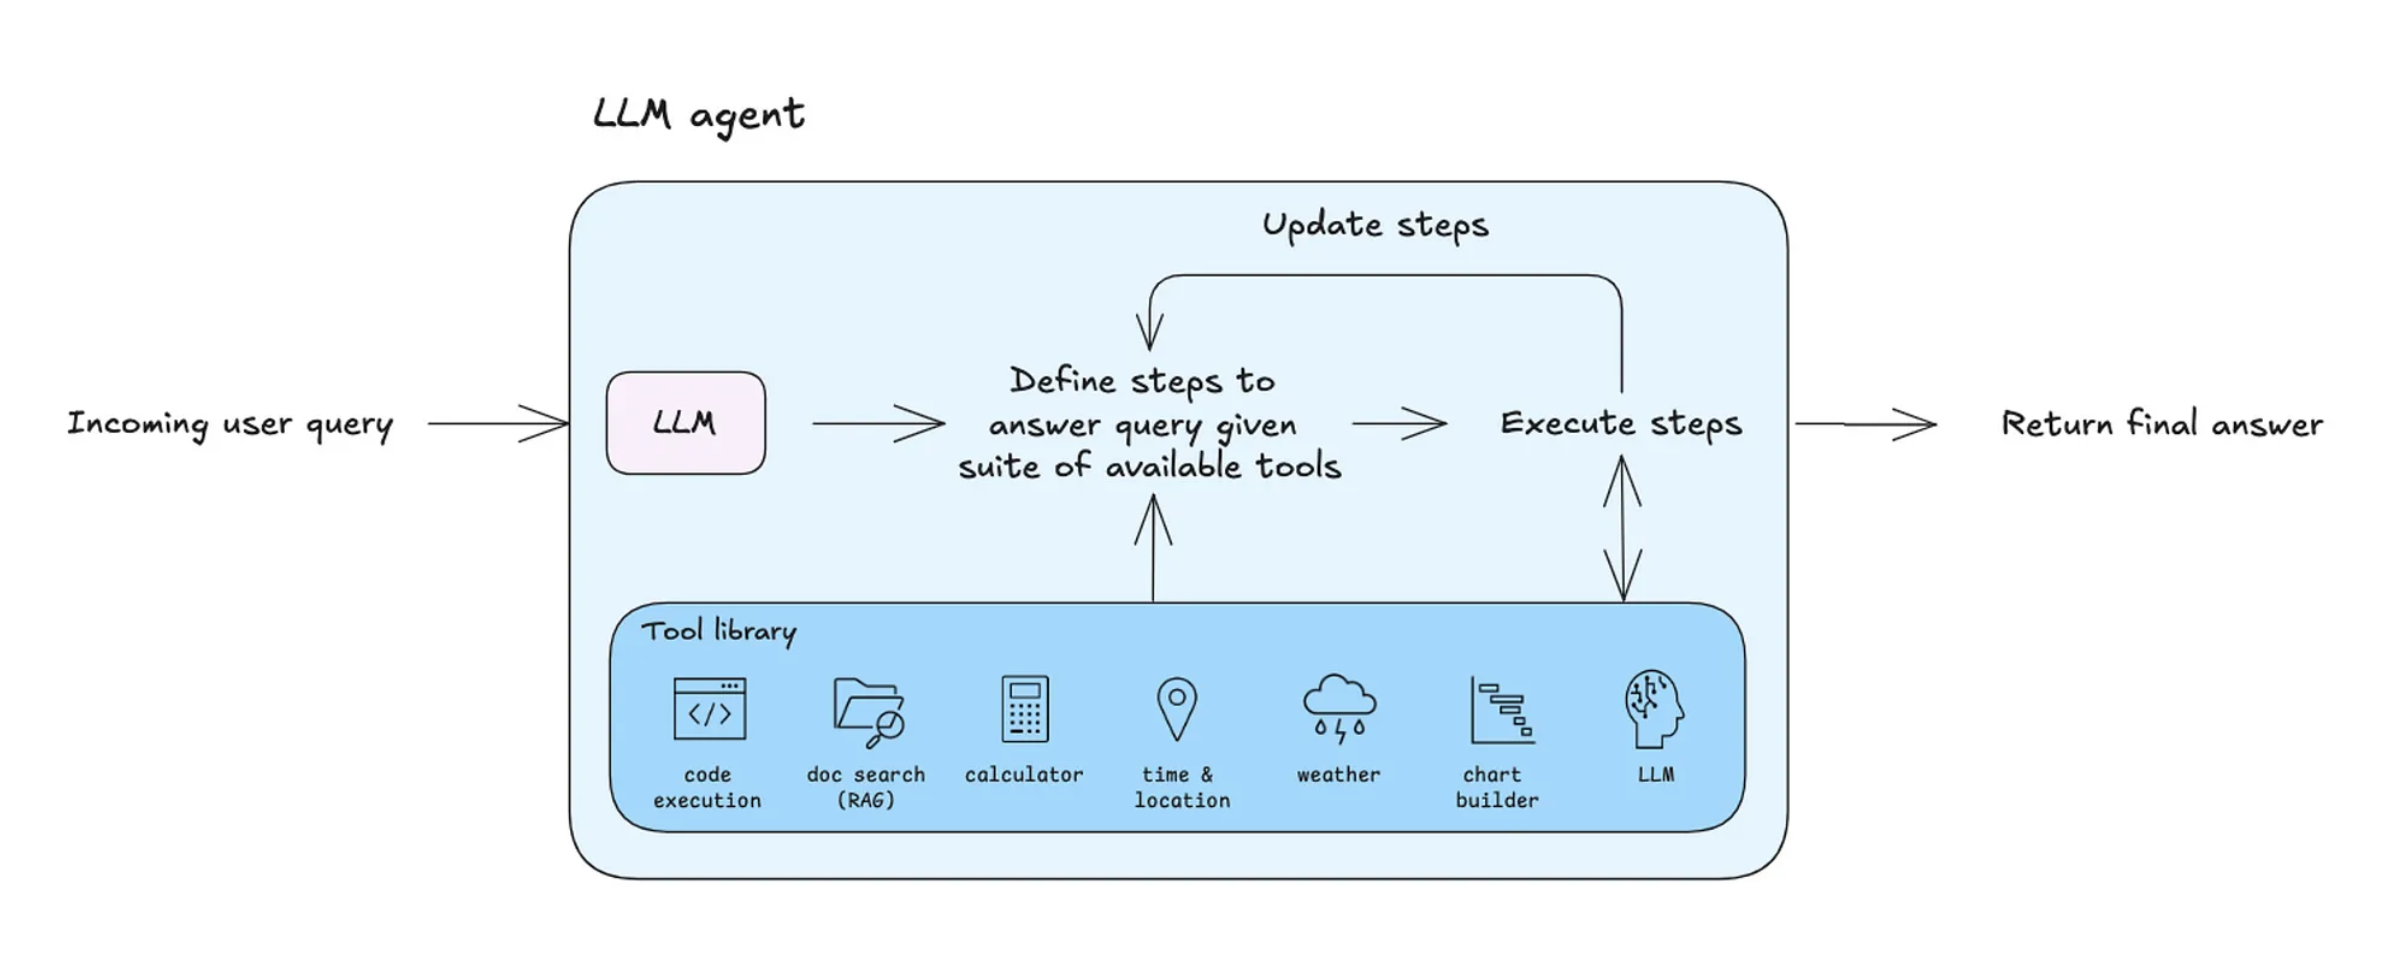

## 🤖 What Makes LLM Agents Special?

- 🔄 **Dynamic Planning**: Unlike few-shot prompting or fixed workflows, LLM agents can define and adapt the steps needed to fulfill a user's query.
- 🧰 **Tool Usage**: Given access to tools (e.g., code execution, web search), the agent can:
  - Decide **which tool** to use
  - Determine **how** to use the tool
  - **Iterate** based on the tool’s output
- 🌐 **Flexibility**: This adaptability allows the agent to support a wide variety of use cases with **minimal configuration**.


## Evolution of LLM Usage: From Prompting to Agents



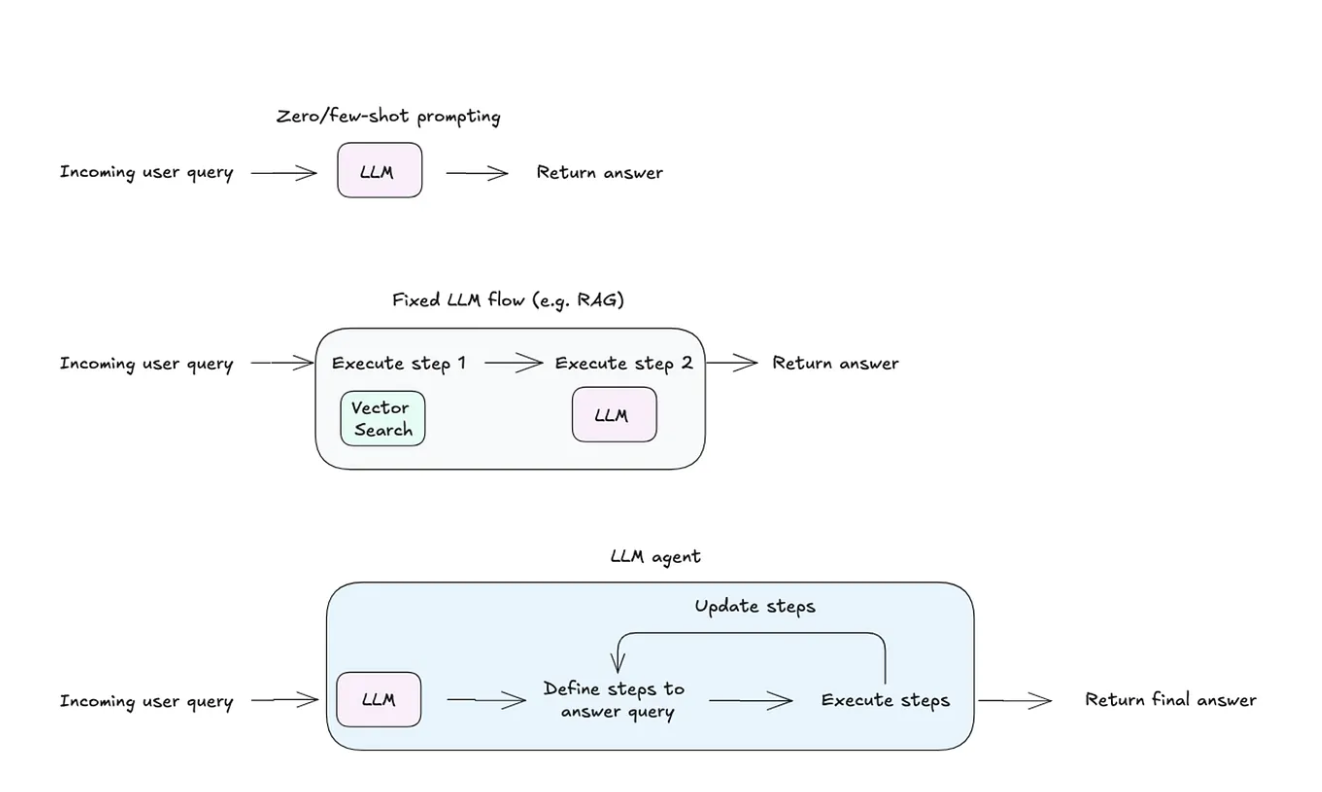

- 🟪 **Zero/Few-shot Prompting**:
  - User query is sent directly to the LLM
  - LLM returns an immediate answer
  - No reasoning or multi-step planning involved

- 🧰 **Fixed LLM Flow (e.g., RAG)**:
  - The system follows a **predefined pipeline** (e.g., Vector Search ➡️ LLM)
  - Executes a fixed set of steps in sequence
  - Suitable for repeatable workflows, but lacks flexibility

- 🤖 **LLM Agent**:
  - LLM dynamically **defines steps** to solve the query
  - Iteratively **executes and updates** the steps based on intermediate results
  - Can choose and use tools, adapt strategy on the fly
  - Ideal for **complex, multi-step** or open-ended tasks


Agentic architectures exist on a spectrum, ranging from the reliability of fixed workflows to the flexibility of autonomous agents. For instance, a fixed flow like Retrieval-Augmented Generation (RAG) can be enhanced with a self-reflection loop, enabling the program to iterate when the initial response falls short. Alternatively, a ReAct agent can be equipped with fixed flows as tools, offering a flexible yet structured approach. The choice of architecture ultimately depends on the use case and the desired trade-off between reliability and flexibility.

## General-purpose LLM agent. Key components


## 🧩 Step 1: Select the Right LLM

Choosing the right LLM is critical for achieving strong agent performance. Key factors to consider:

- 🪪 **Licensing** – Open vs. proprietary models
- 💰 **Cost** – Pricing structure for inference
- 🌍 **Language support** – Does the model handle your target languages well?
- 🧠 **Performance on core tasks** – Especially important for agents:
  - **Reasoning**: Evaluated by **MMLU** ([Massive Multitask Language Understanding](https://paperswithcode.com/sota/multi-task-language-understanding-on-mmlu))
  - **Tool selection & tool calling**: Benchmarked by **[Berkeley’s Function Calling Leaderboard](https://gorilla.cs.berkeley.edu/leaderboard.html)**
  - **Coding**: Evaluated with **[HumanEval](https://evalplus.github.io/leaderboard.html)** and **[BigCodeBench](https://huggingface.co/spaces/bigcode/bigcode-models-leaderboard)**

- 📏 **Context Window**:
  - Agentic workflows often require large context windows (some models support 100K+ tokens)
  - Larger context = smoother multi-step reasoning and tool usage


### Most popular models to consider:

- Commercial models: [GPT4-o](https://platform.openai.com/docs/models/gpt-4o), [Claude 3.5](https://www.anthropic.com/news/claude-3-5-sonnet)
- Open-source models: [Llama3.2](https://huggingface.co/collections/meta-llama/llama-32-66f448ffc8c32f949b04c8cf), [Qwen2.5](https://huggingface.co/collections/Qwen/qwen25-66e81a666513e518adb90d9e).

In general, **larger models** tend to offer **better performance**, but **smaller models that can run locally** are still a solid option. With smaller models, you’ll be limited to simpler use cases and might only be able to connect your agent to one or two basic tools.

## 🧩 Step 2: Define the agent’s control logic
Typical single agent architecture describes communication structure between components

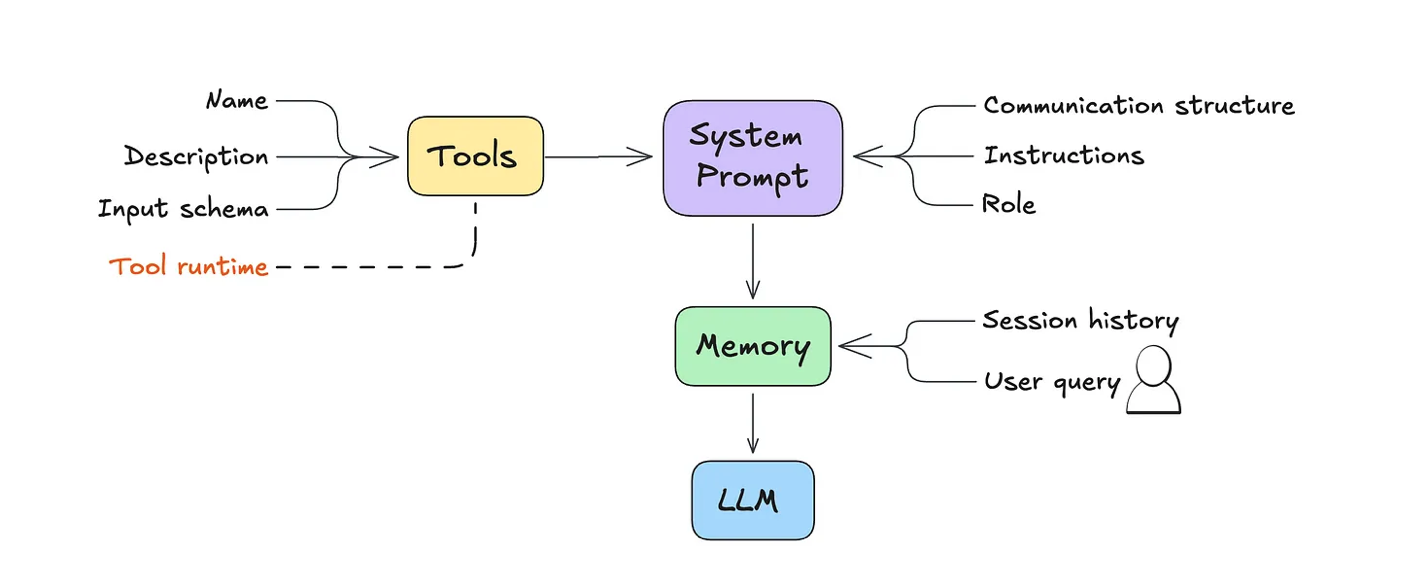

## ⚙️ How It Works?

1. **Tools** define capabilities the agent can use. Each tool has a name, description, and expected input format. These tools become available to the system.

2. **System Prompt** establishes how the agent works. It contains the communication structure, instructions, and role definition that guide the agent's behavior.

3. **Memory** stores two key elements: the conversation history and the current user query. This provides context for the agent to understand the ongoing conversation.

4. **LLM** (Large Language Model) receives all this information – the tools, system prompt, and memory – and generates appropriate responses.

When a user asks something, their query enters memory, combines with conversation history, passes through the system prompt's framework with available tools, and the LLM processes everything to produce a response. Tools can be executed during this process if needed.


**! Important**

The main difference between a simple LLM and an agent comes down to the **system prompt.**
[The system prompt](https://promptengineering.org/system-prompts-in-large-language-models/), in the context of an LLM, is a set of instructions and contextual information provided to the model before it engages with user queries.
The agentic behavior expected of the LLM can be codified within the system prompt.


Here are some common agentic patterns, which can be customized to fit your needs:

**Tool Use:** The agent determines when to route queries to the appropriate tool or rely on its own knowledge.

**Reflection:** The agent reviews and corrects its answers before responding to the user. A reflection step can also be added to most LLM systems.

**Reason-then-Act (ReAct): **The agent iteratively reasons through how to solve the query, performs an action, observes the outcome, and determines whether to take another action or provide a response.

**Plan-then-Execute:** The agent plans upfront by breaking the task into sub-steps (if needed) and then executes each step.

The last two patterns — **ReAct** and **Plan-then-Execute** — are often the **best starting point** for building a general-purpose single agent.

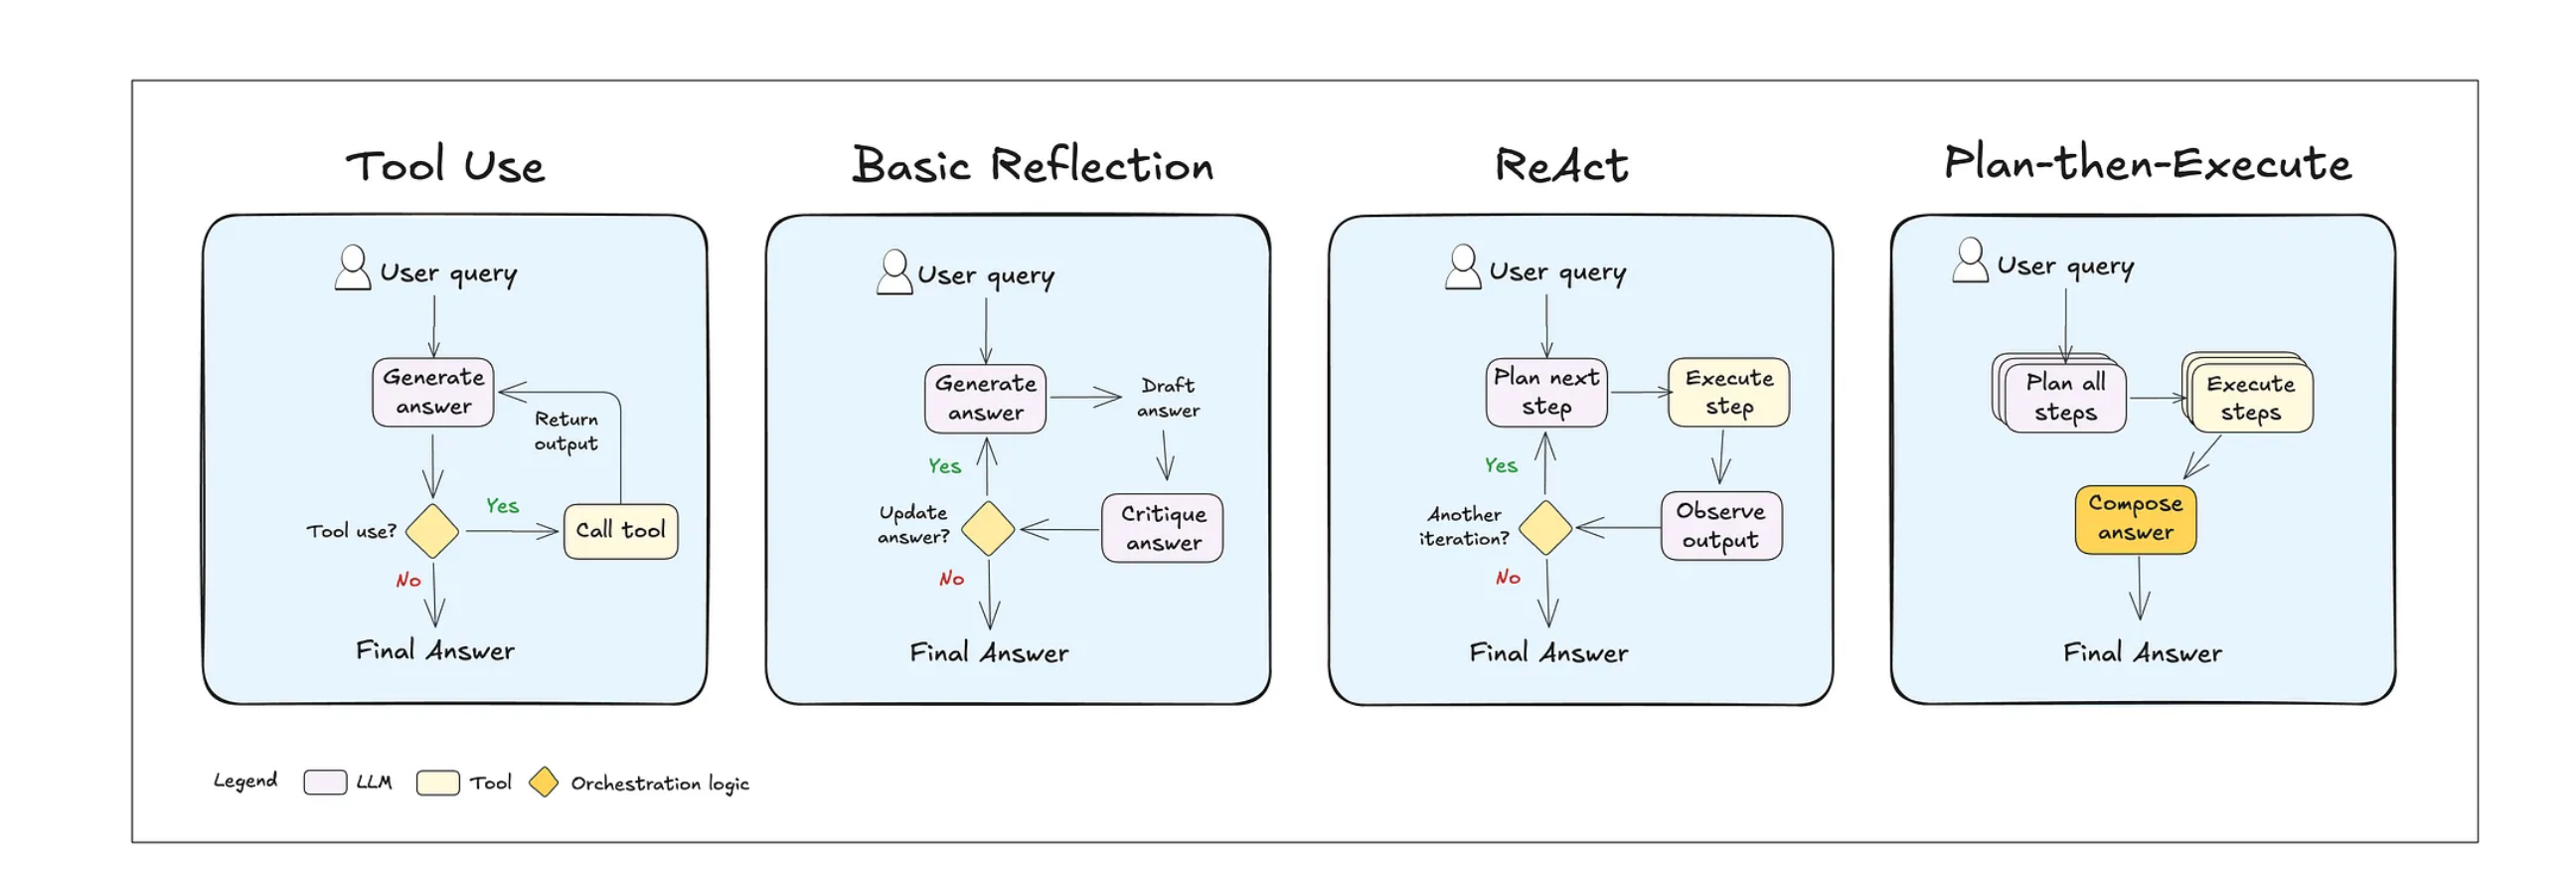

To implement these behaviors effectively, you’ll need to do some prompt engineering. [Structured generation technique](https://python.langchain.com/v0.1/docs/modules/model_io/chat/structured_output/) is very useful in such case. This basically means shaping the LLM’s output to match a specific format or schema, so the agent’s responses stay consistent with the communication style you’re aiming for.

## 🛠️ Prompt Engineering & Structured Generation

To implement effective agent behavior, consider the following:

- ✏️ **Prompt Engineering**  
  - Craft prompts that guide the LLM's behavior, tone, and reasoning process
  - Define roles, communication style, and expectations clearly

- 🧾 **Structured Generation**  
  - Shape the LLM’s output to match a specific **format or schema**
  - Ensures the agent's responses remain consistent and predictable
  - Useful for maintaining clarity in multi-step reasoning or tool usage

👉 Together, these techniques help the agent act reliably and communicate in your desired style.


## **Example of the detailed prompt structure **

### Communication structure
You communicate only in instruction lines. The format is: "Instruction: expected output". You must only use these instruction lines and must not enter empty lines or anything else between instruction lines.
You must skip the instruction lines Function Name, Function Input and Function Output if no function calling is required.

Message: User's message. You never use this instruction line.

Thought: A single-line plan of how to answer the user's message. It must be immediately followed by Final Answer.

Thought: A single-line step-by-step plan of how to answer the user's message. You can use the available functions defined above. This instruction line must be immediately followed by Function Name if one of the available functions defined above needs to be called, or by Final Answer. Do not provide the answer here.

Function Name: Name of the function. This instruction line must be immediately followed by Function Input.

Function Input: Function parameters. Empty object is a valid parameter.

Function Output: Output of the function in JSON format.

Thought: Continue your thinking process.

Final Answer: Answer the user or ask for more information or clarification. It must always be preceded by Thought.

### Examples
Message: Can you translate "How are you" into French?

Thought: The user wants to translate a text into French. I can do that.

Final Answer: Comment vas-tu?

## 🧩 Step 3: Define the agent’s core instructions

We tend to take for granted that LLMs come with a bunch of features right out of the box. Some of these are great, but others might not be exactly what you need. To get the performance you’re after, it’s important to spell out all the features you want — and don’t want — in the system prompt.
This could include instructions like:

- **Agent Name and Role**: What the agent is called and what it’s meant to do.
- **Tone and Conciseness**: How formal or casual it should sound, and how brief it should be.
- **When to Use Tools**: Deciding when to rely on external tools versus the model’s own knowledge.
- **Handling Errors**: What the agent should do when something goes wrong with a tool or process.

## Example of the prompt:

### Instructions
User can only see the Final Answer, all answers must be provided there.
You must always use the communication structure and instructions defined above. Do not forget that Thought must be a single-line immediately followed by Final Answer.
You must always use the communication structure and instructions defined above. Do not forget that Thought must be a single-line immediately followed by either Function Name or Final Answer.
Functions must be used to retrieve factual or historical information to answer the message.
If the user suggests using a function that is not available, answer that the function is not available. You can suggest alternatives if appropriate.
When the message is unclear or you need more information from the user, ask in Final Answer.

### Your capabilities
Prefer to use these capabilities over functions.
- You understand these languages: English, Spanish, French.
- You can translate and summarize, even long documents.

### Notes
- If you don't know the answer, say that you don't know.
- The current time and date in ISO format can be found in the last message.
- When answering the user, use friendly formats for time and date.
- Use markdown syntax for formatting code snippets, links, JSON, tables, images, files.
- Sometimes, things don't go as planned. Functions may not provide useful information on the first few tries. You should always try a few different approaches before declaring the problem unsolvable.
- When the function doesn't give you what you were asking for, you must either use another function or a different function input.
  - When using search engines, you try different formulations of the query, possibly even in a different language.
- You cannot do complex calculations, computations, or data manipulations without using functions.m

## 🧩 Step 4. Define and optimize your core tools

🧰 **What Are Tools in an Agentic System?**

Tools are external functions or services that the LLM can call to extend its capabilities — like plugins or APIs.
They let your agent do things it can’t do on its own (e.g., run code, search the web, read a file).

🧠 **Why They Matter**
Even with a small set of well-defined tools, your agent can handle a wide range of tasks — thanks to its ability to decide when and how to use each tool.

🔑 Common Examples of Tools:
- Code execution (e.g., Python shell)
- Web search
- File reading (e.g., PDFs, CSVs)
- Data analysis (e.g., statistical summaries, plotting)






###🛠️ What You Need to Define for Each Tool

Each tool must be clearly described in the system prompt so the agent knows how to use it. You’ll need:

- **Tool Name:**
A short, unique, descriptive identifier (e.g., "run_python_code")

- **Tool Description:**
Explains what the tool does and when to use it — helps the LLM choose the right tool.

- **Tool Input Schema:**
Specifies the tool's inputs, including:
 - Required/optional fields
 - Data types
 - Valid value ranges or constraints

- **Tool Runtime Pointer:**
Information on how or where the tool is executed (e.g., local function, API endpoint, or cloud service)

In certain cases, you’ll need to optimize tools to get the performance you’re looking for. This might involve tweaking the tool name or description with some prompt engineering, setting up advanced configurations to handle common errors, or filtering the tool’s output.

## 🧩 Step 5. Decide on a memory handling strategy

*Memory, in the context of an agent, refers to the system’s capability to store, recall, and utilize information from past interactions. This enables the agent to maintain context over time, improve its responses based on previous exchanges, and provide a more personalized experience.*

## Context Window & Memory Management

- 🧾 **LLMs have a limited context window**  
  - This is the maximum number of tokens (words, punctuation, etc.) the model can "remember" at once.
  
- ⏳ **What fills up the context window?**
  - Multi-turn conversation history
  - Tool outputs
  - Additional context (e.g., documents, retrieved results)

- ⚠️ When the context window is full:
  - Important information may get **truncated**
  - The model may **forget** earlier steps or inputs

- ✅ **Why memory handling matters**
  - A solid memory strategy ensures the agent retains relevant info while staying within token limits
  - Techniques include summarization, chunking, or external memory modules


##Common Memory Handling Strategies:
- **Sliding Memory**: Keep the last k conversation turns in memory and drop the older ones.
- **Token Memory**: Keep the last n tokens and forget the rest.
- **Summarized Memory**: Use the LLM to summarize the conversation at each turn and drop the individual messages.

Additionally, you can also have an LLM detect key moments to store in long-term memory. This allows the agent to “remember” important facts about the user, making the experience even more personalized.

## 🧩 Step 6. Parse the agent’s raw output

*A parser is a function that converts raw data into a format your application can understand and work with (like an object with properties)*

For the agent we’re building, the parser needs to recognize the communication structure we defined in **Step 2** and return a structured output, like JSON. This makes it easier for the application to process and execute the agent’s next steps.

**Note**: some model providers like OpenAI, can return parsable outputs by default. For other models, especially open-source ones, this would need to be configured.


## 🧩 Step 7. Orchestrate the agent’s next step

The final step is setting up the orchestration logic. This determines what happens after the LLM outputs a result. Depending on the output, you’ll either:

1. **Execute a tool call**, or
2. **Return an answer** — either the final response to the user’s query or a follow-up request for more information.

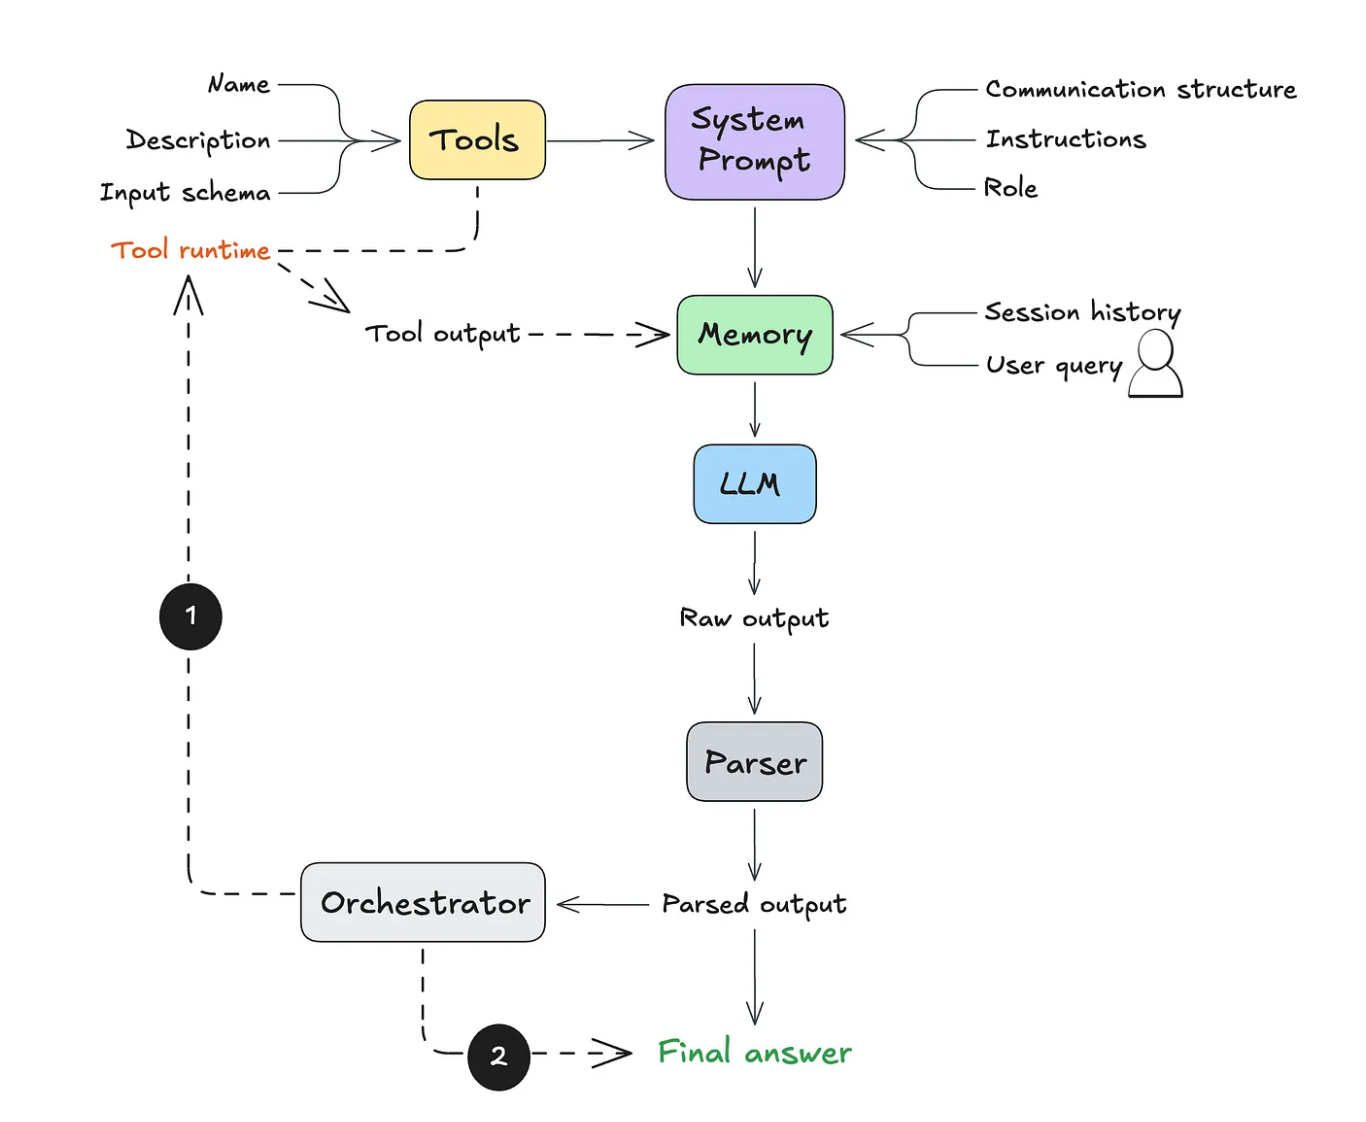

If a tool call is triggered, the tool’s output is sent back to the LLM (as part of its working memory). The LLM would then determine what to do with this new information: either perform another tool call or return an answer to the user.

## 🎉 And Voilà!

You now have a powerful agentic system capable of handling a wide range of use cases, including:

- 📊 **Competitive analysis**
- 🔍 **Advanced research**
- 🤖 **Automation of complex workflows**

With the right tools, prompts, and memory strategy in place, your LLM agent is ready to go beyond basic chat — and start doing real work.


## 🤝 Where Do Multi-Agent Systems Come In?

While modern LLMs are powerful, they have key **limitations**:

- 🧠 **Information overload**: Too much context (e.g., tools, history, data) can overwhelm a single agent
- ⚠️ **Token limits**: Agentic workflows are token-hungry and can hit the LLM's context window ceiling

### 👥 When to Use Multi-Agent Systems

- A **multi-agent setup** divides responsibilities among several specialized agents
- This helps:
  - Reduce context overload on any single agent
  - Improve efficiency and manageability
  - Scale more effectively for complex workflows

### 🧪 Why Start with a Single Agent?

- A **general-purpose single agent** is ideal for rapid prototyping
- It allows you to:
  - ✅ Identify which parts benefit from agentic reasoning
  - 🔍 Spot bottlenecks or limitations in your current setup
  - 🔧 Discover components that could become independent agents later

➡️ **Start simple**, then evolve into multi-agent systems as your needs grow.


## Tools to build agents
- LlamaIndex
- LangGraph
- small Agents